In [1]:
# %pip install matplotlib pandas numpy seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [3]:
cols = np.load('../Data/Final/ClashOfClans_cols.npy', allow_pickle=True)
arr = np.load('../Data/Final/ClashOfClans.npy', allow_pickle=True)
df = pd.DataFrame(arr, columns=cols)

# Summary

In [4]:
df.columns

Index(['post_id', 'text', 'post_text', 'shared_text', 'original_text', 'time',
       'timestamp', 'image', 'image_lowquality', 'images',
       'images_description', 'images_lowquality',
       'images_lowquality_description', 'video', 'video_duration_seconds',
       'video_height', 'video_id', 'video_quality', 'video_size_MB',
       'video_thumbnail', 'video_watches', 'video_width', 'likes', 'comments',
       'shares', 'post_url', 'link', 'links', 'user_id', 'username',
       'user_url', 'is_live', 'factcheck', 'shared_post_id', 'shared_time',
       'shared_user_id', 'shared_username', 'shared_post_url', 'available',
       'comments_full', 'reactors', 'w3_fb_url', 'reactions', 'reaction_count',
       'with', 'page_id', 'sharers', 'image_id', 'image_ids', 'was_live',
       'video_ids', 'videos', 'header'],
      dtype='object')

In [5]:
df = df[['post_id', 'time', 'post_text', 
            'images_description', 'shares', 'comments',
                'comments_full', 'reaction_count',
                'reactions', 'reactors']]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   post_id             167 non-null    object        
 1   time                167 non-null    datetime64[ns]
 2   post_text           167 non-null    object        
 3   images_description  167 non-null    object        
 4   shares              167 non-null    object        
 5   comments            167 non-null    object        
 6   comments_full       167 non-null    object        
 7   reaction_count      167 non-null    object        
 8   reactions           167 non-null    object        
 9   reactors            167 non-null    object        
dtypes: datetime64[ns](1), object(9)
memory usage: 13.2+ KB


In [7]:
df[['shares', 'comments', 'reaction_count']] = df[['shares', 'comments', 'reaction_count']].astype(int)
df.describe()

,time,shares,comments,reaction_count
count,167,167.000000,167.000000,167.000000
mean,2023-07-10 06:43:55.670658816,187.215569,543.634731,6608.401198
min,2022-12-12 17:57:11,3.000000,31.000000,358.000000
25%,2023-04-24 05:01:35,29.000000,299.000000,2547.000000
50%,2023-08-15 15:00:49,42.000000,429.000000,4234.000000
75%,2023-09-30 09:07:58,101.000000,672.000000,6631.000000
max,2023-11-07 20:15:02,14000.000000,3700.000000,248302.000000
std,NaN,1100.436557,456.975789,19276.037022


Text(0.5, 0, 'Index')

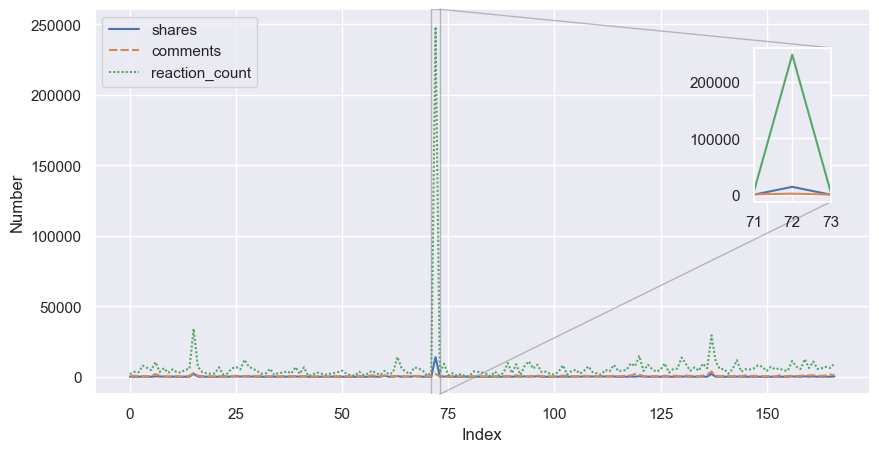

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(df[['shares', 'comments', 'reaction_count']])

axin = ax.inset_axes([0.85, 0.5, 0.1, 0.4])
axin.plot(df[['shares', 'comments', 'reaction_count']])
axin.set_xlim(71, 73)
ax.indicate_inset_zoom(axin)
ax.set_ylabel("Number")
ax.set_xlabel('Index')

In [9]:
print('url = https://www.facebook.com/ClashofClans/posts/' + df['post_id'].iloc[72])

url = https://www.facebook.com/ClashofClans/posts/849314546550406


# Reaction

In [10]:
df.columns

Index(['post_id', 'time', 'post_text', 'images_description', 'shares',
       'comments', 'comments_full', 'reaction_count', 'reactions', 'reactors'],
      dtype='object')

In [11]:
reactions = pd.DataFrame(df[['post_id', 'time', 'reaction_count', 'reactions', 'reactors']])

In [12]:
reactions['like'] = reactions['reactions'].map(lambda x: x['like'])
reactions['haha'] = reactions['reactions'].map(lambda x: x['haha'])
reactions['love'] = reactions['reactions'].map(lambda x: x['love'])
reactions['wow'] = reactions['reactions'].map(lambda x: x['wow'])
reactions['sad'] = reactions['reactions'].map(lambda x: x['sad'])
reactions['angry'] = reactions['reactions'].map(lambda x: x['angry'])
reactions['care'] = reactions['reactions'].map(lambda x: x['care'])

In [13]:
reactions[['like', 'love', 'wow', 'haha', 'care', 'angry', 'sad']].describe()

,like,love,wow,haha,care,angry,sad
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,4907.514970,1382.167665,113.341317,91.071856,83.808383,17.526946,12.970060
std,15936.195342,2819.438079,477.783913,286.438466,274.421142,39.996508,46.737208
min,277.000000,56.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,1947.000000,466.500000,10.000000,12.500000,26.500000,4.000000,2.000000
50%,3258.000000,780.000000,15.000000,23.000000,45.000000,7.000000,4.000000
75%,4691.500000,1476.500000,32.500000,41.500000,85.000000,17.000000,10.500000
max,206958.000000,33290.000000,4240.000000,3085.000000,3495.000000,430.000000,528.000000


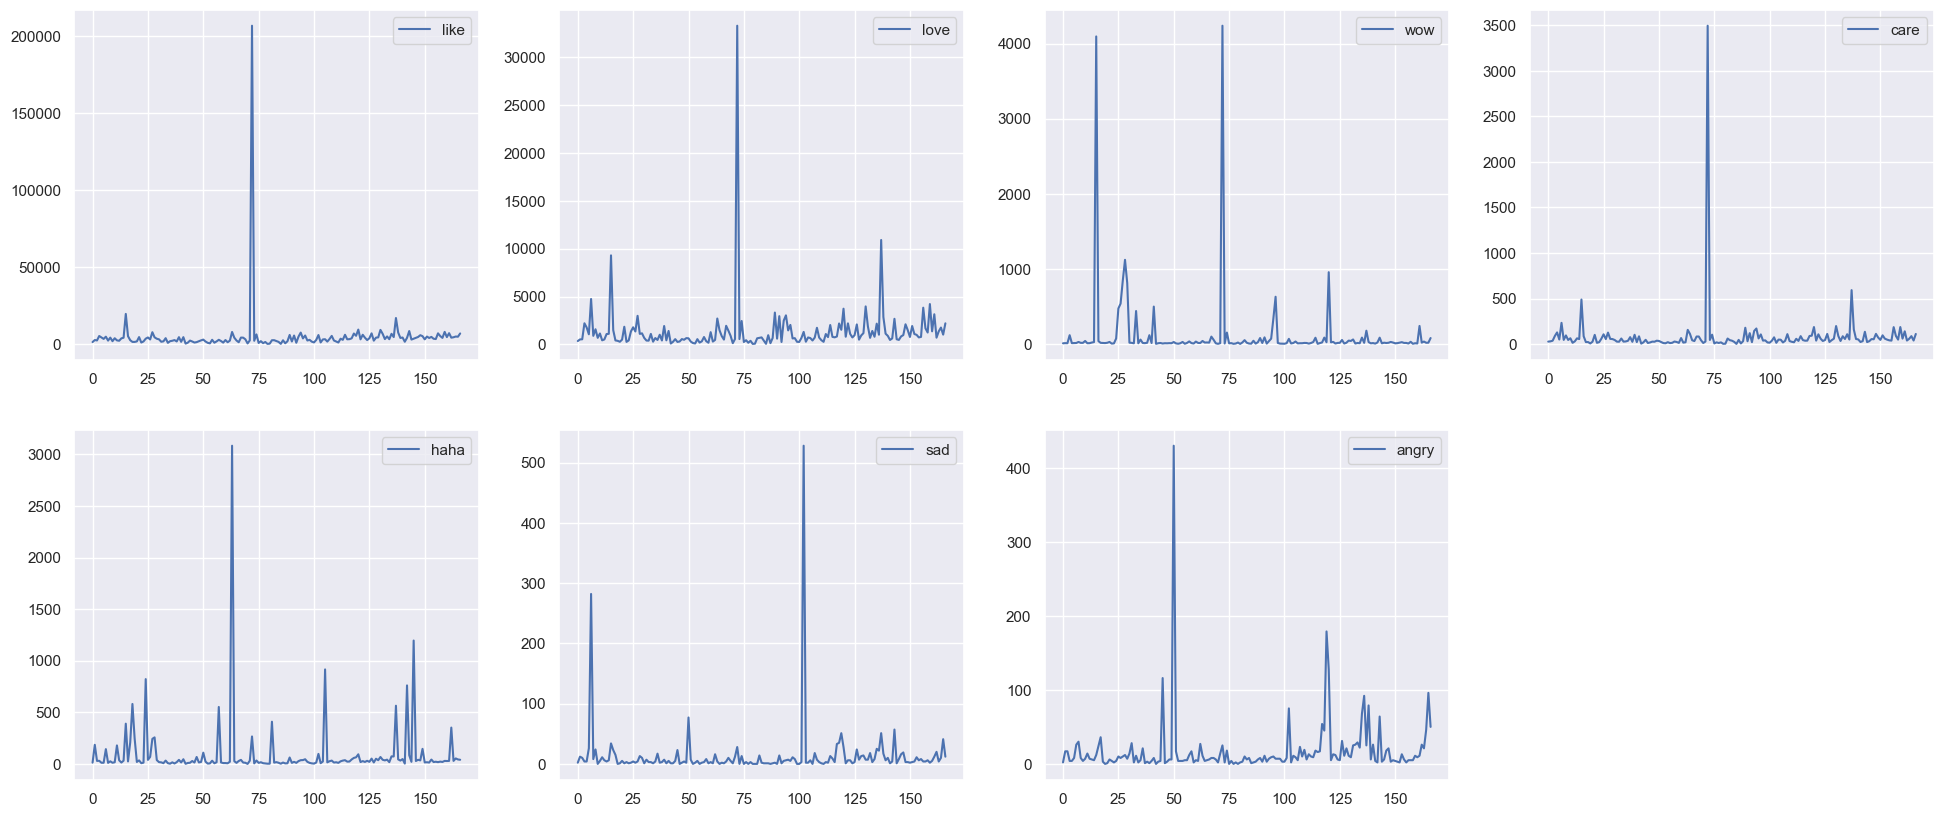

In [14]:
fig, axs = plt.subplots(2, 4, figsize=(24, 10))

sns.lineplot(reactions['like'], ax=axs[0, 0], label='like')
sns.lineplot(reactions['love'], ax=axs[0, 1], label='love')
sns.lineplot(reactions['wow'], ax=axs[0, 2], label='wow')
sns.lineplot(reactions['haha'], ax=axs[1, 0], label='haha')
sns.lineplot(reactions['care'], ax=axs[0, 3], label='care')
sns.lineplot(reactions['angry'], ax=axs[1, 2], label='angry')
sns.lineplot(reactions['sad'], ax=axs[1, 1], label='sad')

axs[1, 3].remove()
axs[0, 0].set_ylabel('')
axs[0, 0].grid(True)
axs[0, 1].set_ylabel('')
axs[0, 1].grid(True)
axs[0, 2].set_ylabel('')    
axs[0, 2].grid(True)
axs[0, 3].set_ylabel('')
axs[0, 3].grid(True)
axs[1, 0].set_ylabel('')
axs[1, 0].grid(True)
axs[1, 1].set_ylabel('')
axs[1, 1].grid(True)
axs[1, 2].set_ylabel('')
axs[1, 2].grid(True)

## Check high peaks

In [15]:
reactions.loc[reactions['like'] > 20000]

,post_id,time,reaction_count,reactions,reactors,like,haha,love,wow,sad,angry,care
72,849314546550406,2023-08-23 23:48:43,248302,"{'like': 206958, 'love': 33290, 'haha': 266, '...","[{'name': 'Mubasher Ali', 'link': 'https://fac...",206958,266,33290,4240,28,25,3495


In [16]:
reactions.loc[reactions['love'] > 20000]

,post_id,time,reaction_count,reactions,reactors,like,haha,love,wow,sad,angry,care
72,849314546550406,2023-08-23 23:48:43,248302,"{'like': 206958, 'love': 33290, 'haha': 266, '...","[{'name': 'Mubasher Ali', 'link': 'https://fac...",206958,266,33290,4240,28,25,3495


In [17]:
reactions.loc[reactions['wow'] > 4000]

,post_id,time,reaction_count,reactions,reactors,like,haha,love,wow,sad,angry,care
15,882200249928502,2023-10-23 22:00:07,34074,"{'like': 19748, 'love': 9303, 'haha': 390, 'wo...","[{'name': 'Noorullah Ramazani', 'link': 'https...",19748,390,9303,4097,34,12,490
72,849314546550406,2023-08-23 23:48:43,248302,"{'like': 206958, 'love': 33290, 'haha': 266, '...","[{'name': 'Mubasher Ali', 'link': 'https://fac...",206958,266,33290,4240,28,25,3495


In [18]:
reactions.loc[reactions['sad'] > 200]

,post_id,time,reaction_count,reactions,reactors,like,haha,love,wow,sad,angry,care
6,887129712768889,2023-11-01 22:32:35,10423,"{'like': 4978, 'love': 4747, 'haha': 143, 'wow...","[{'name': 'LogicLoom Luminary', 'link': 'https...",4978,143,4747,13,282,26,234
102,832161388265722,2023-07-21 18:59:00,8177,"{'like': 6027, 'love': 1307, 'haha': 97, 'wow'...","[{'name': 'きえ フラン', 'link': 'https://facebook....",6027,97,1307,68,528,75,75


In [19]:
reactions.loc[reactions['angry'] > 150]

,post_id,time,reaction_count,reactions,reactors,like,haha,love,wow,sad,angry,care
50,864489661699561,2023-09-21 19:12:21,4375,"{'like': 3057, 'love': 641, 'haha': 109, 'wow'...","[{'name': 'Di Mo', 'link': 'https://facebook.c...",3057,109,641,26,77,430,35
119,6804789822878616,2023-05-16 14:41:30,7490,"{'like': 5550, 'love': 1530, 'haha': 64, 'wow'...","[{'name': 'Halil İbrahim Yaşar', 'link': 'http...",5550,64,1530,23,51,179,93


In [20]:
reactions.loc[reactions['haha'] > 3000]

,post_id,time,reaction_count,reactions,reactors,like,haha,love,wow,sad,angry,care
63,855786275903233,2023-09-05 19:10:54,14024,"{'like': 8023, 'love': 2704, 'haha': 3085, 'wo...","[{'name': 'Ke Shara', 'link': 'https://faceboo...",8023,3085,2704,40,4,11,157


## >>>

In [21]:
reactions.drop(index=72, axis=0, inplace=True)

In [22]:
import SeabornFig2Grid as sfg
import matplotlib.gridspec as gridspec

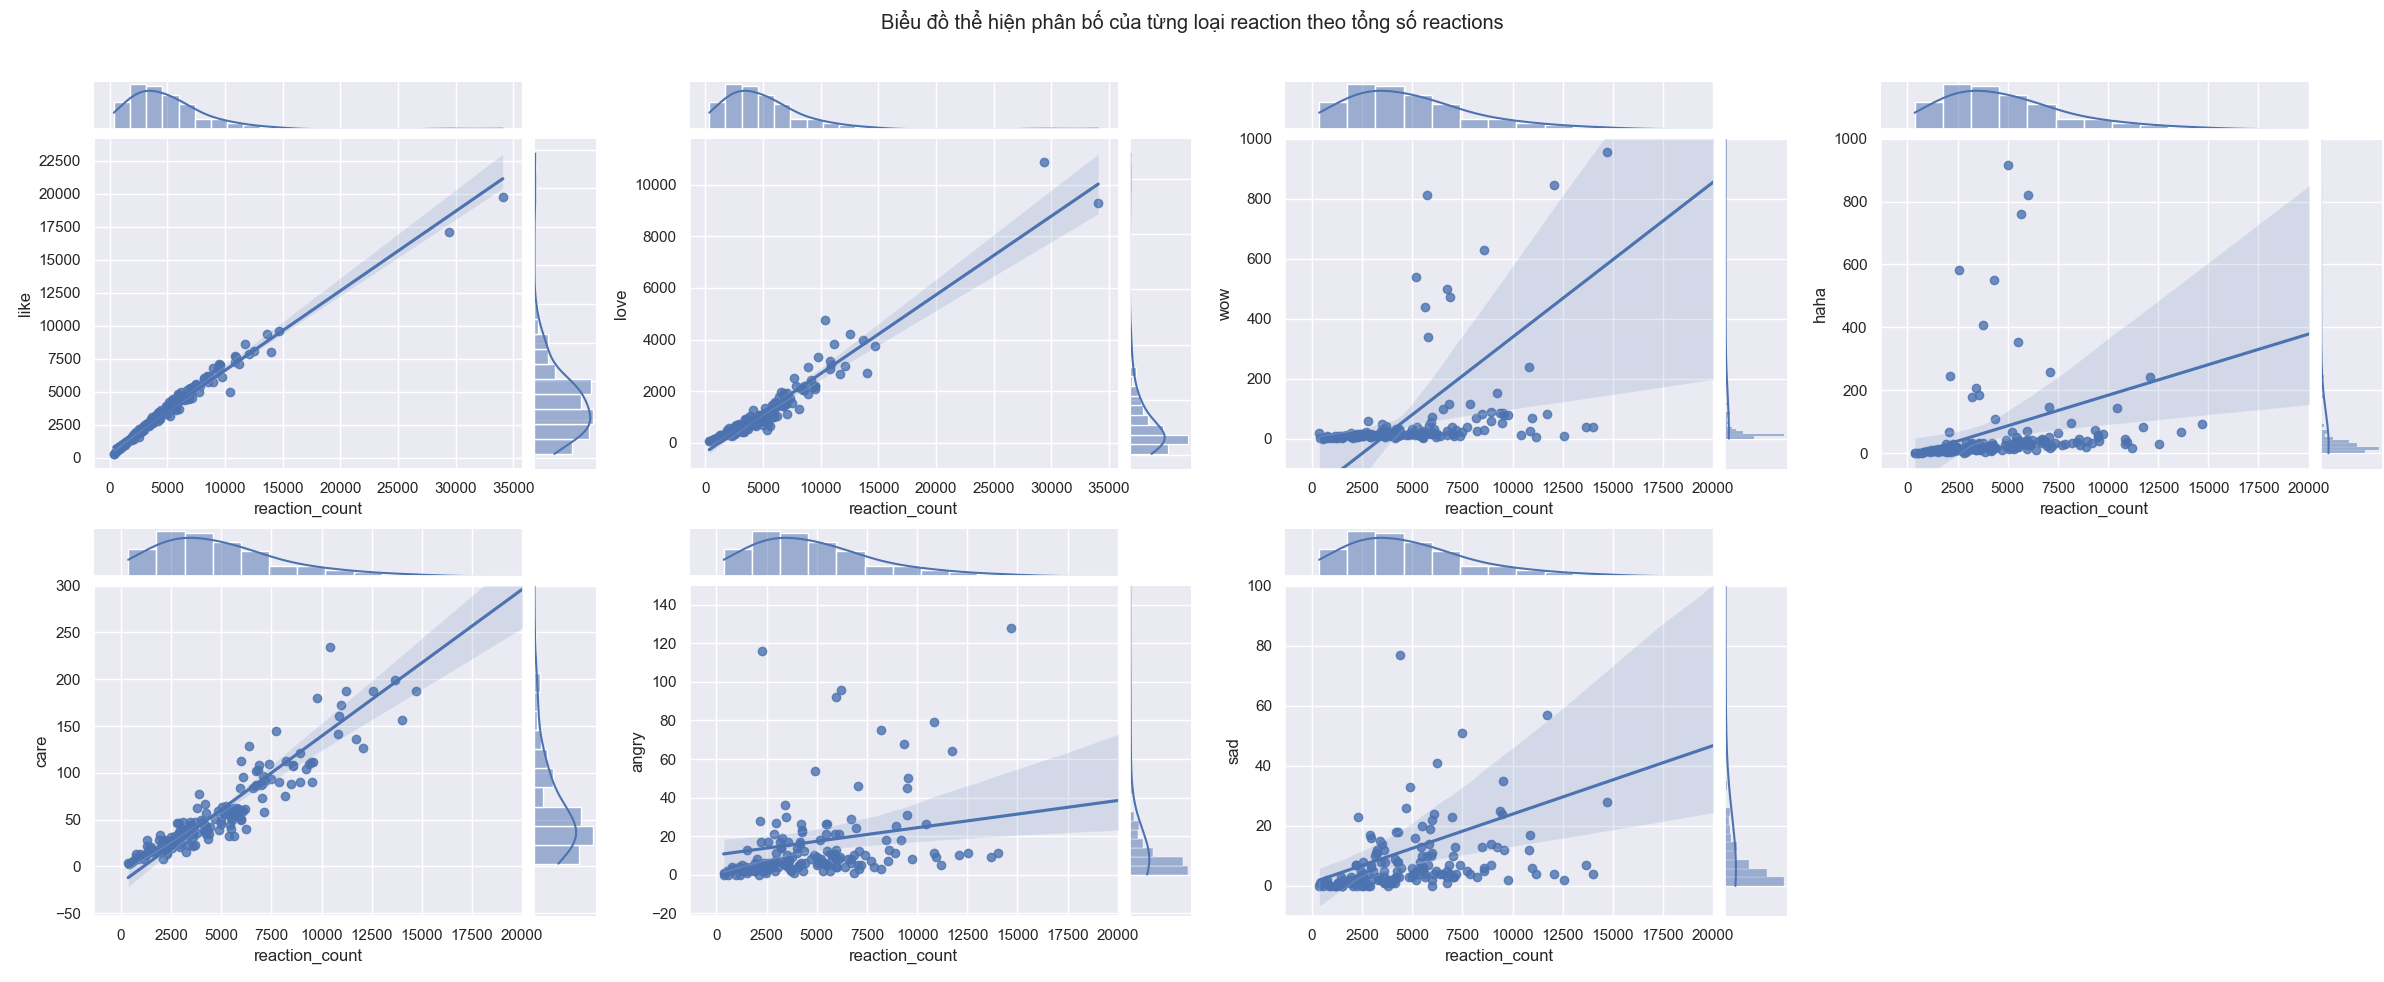

In [23]:
ax0 = sns.jointplot(data=reactions, x="reaction_count", y="like", kind="reg")

ax1 = sns.jointplot(data=reactions, x="reaction_count", y="love", kind="reg")

ax2 = sns.jointplot(data=reactions, x="reaction_count", y="wow", kind="reg")
ax2.ax_marg_x.set_xlim(None, 20000)
ax2.ax_marg_y.set_ylim(-100, 1000)

ax3 = sns.jointplot(data=reactions, x="reaction_count", y="haha", kind="reg")
ax3.ax_marg_x.set_xlim(None, 20000)
ax3.ax_marg_y.set_ylim(-50, 1000)

ax4 = sns.jointplot(data=reactions, x="reaction_count", y="care", kind="reg")
ax4.ax_marg_x.set_xlim(None, 20000)
ax4.ax_marg_y.set_ylim(None, 300)

ax5 = sns.jointplot(data=reactions, x="reaction_count", y="angry", kind="reg")
ax5.ax_marg_x.set_xlim(None, 20000)
ax5.ax_marg_y.set_ylim(None, 150)

ax6 = sns.jointplot(data=reactions, x="reaction_count", y="sad", kind="reg")
ax6.ax_marg_x.set_xlim(None, 20000)
ax6.ax_marg_y.set_ylim(-10, 100)

# ax7 = sns.lmplot(x='like', y='love', data=reactions)

fig = plt.figure(figsize=(24,10))
gs = gridspec.GridSpec(2, 4)

mg0 = sfg.SeabornFig2Grid(ax0, fig, gs[0])
mg1 = sfg.SeabornFig2Grid(ax1, fig, gs[1])
mg2 = sfg.SeabornFig2Grid(ax2, fig, gs[2])
mg3 = sfg.SeabornFig2Grid(ax3, fig, gs[3])
mg4 = sfg.SeabornFig2Grid(ax4, fig, gs[4])
mg5 = sfg.SeabornFig2Grid(ax5, fig, gs[5])
mg6 = sfg.SeabornFig2Grid(ax6, fig, gs[6])
# mg7 = sfg.SeabornFig2Grid(ax7, fig, gs[7])

gs.tight_layout(fig)
gs.update(top=0.9)
plt.suptitle("Biểu đồ thể hiện phân bố của từng loại reaction theo tổng số reactions")
plt.show()

## Reactors

In [26]:
reactions['reactors'].iloc[0]

[{'name': 'Di Mo',
  'link': 'https://facebook.com/profile.php?id=100095717490800&eav=AfZ2FUoxX2PgxTn4XSgGbIHR2X-tXfBztxof2m03YtIgziPK73GhoQWXLSTGzdHEYhY&fref=pb&paipv=0',
  'type': 'like'},
 {'name': 'Mike Bagahansol',
  'link': 'https://facebook.com/profile.php?id=100095305552506&eav=AfbwIFVbq4AFCX6B0nXac_Ds0V3klGFzHLnN9Z2f6FHDyBgKm24MRapr3nTW5OoC5OE&fref=pb&paipv=0',
  'type': 'love'},
 {'name': 'Prisca Dubois',
  'link': 'https://facebook.com/profile.php?id=100095214038423&eav=AfbYa7FwMAcUcagR6LQt4esnFlzWqKbfOS3pYHHO_n6A5SRM057_F4M-a5ZWC3yOyWc&fref=pb&paipv=0',
  'type': 'like'},
 {'name': 'Thein Hlaing',
  'link': 'https://facebook.com/theinhlaingmdl19par?eav=AfavYFJD9rxvlT83akrhorLTrjMLdyJsfZKTf44_-c8--gwaI2ynCclmFJQNuRSTIE4&fref=pb&paipv=0',
  'type': 'love'},
 {'name': 'Md Chanchal Chanchal',
  'link': 'https://facebook.com/profile.php?id=100094852464222&eav=Afb7hnfabpChsNLdlPYO5sMRI_7-eEIxO3hWcuBIlvGokP4p6-sdQHpjkBbfcIKDsbE&fref=pb&paipv=0',
  'type': 'like'},
 {'name': 'Vishn